In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


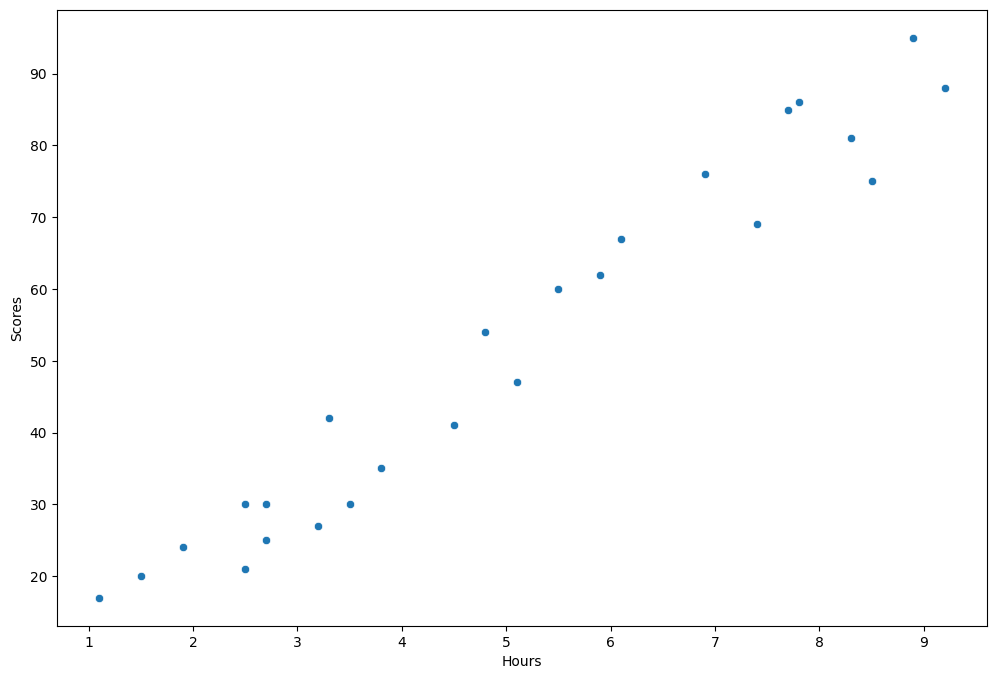

In [9]:
#plotting the plot between the hours and score
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Hours',y='Scores')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

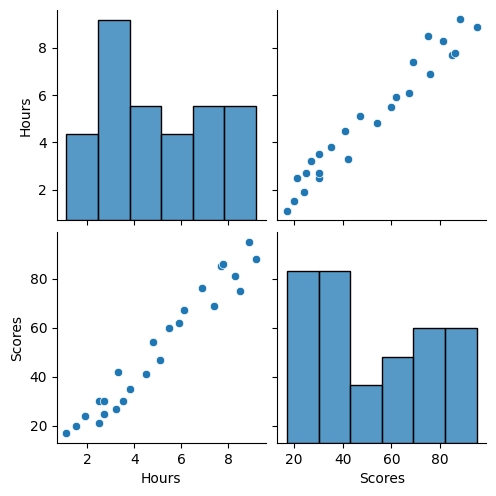

In [10]:
#
sns.pairplot(df)

<BarContainer object of 25 artists>

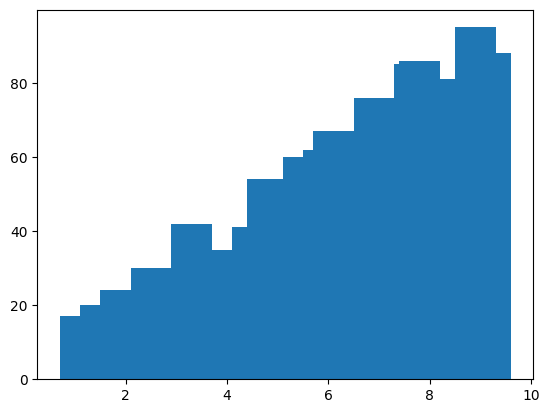

In [14]:
plt.bar(df['Hours'],df['Scores'])

<Axes: xlabel='Hours', ylabel='Scores'>

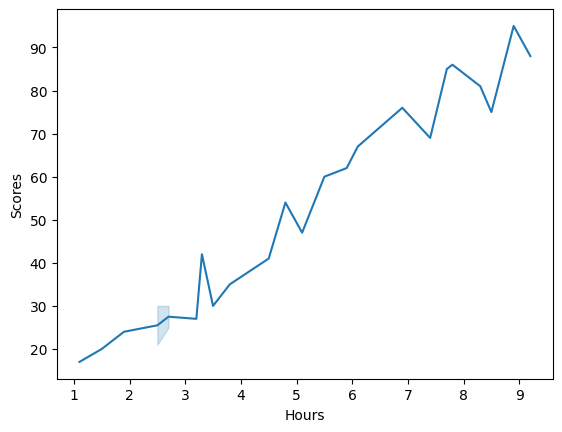

In [15]:
sns.lineplot(x='Hours',y='Scores',data=df)

<Axes: xlabel='Hours', ylabel='Scores'>

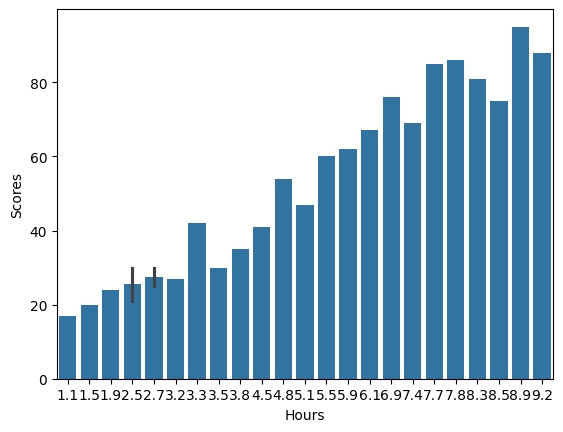

In [16]:
#bar plot 
sns.barplot(x='Hours',y='Scores',data=df)

<Axes: xlabel='Hours', ylabel='Scores'>

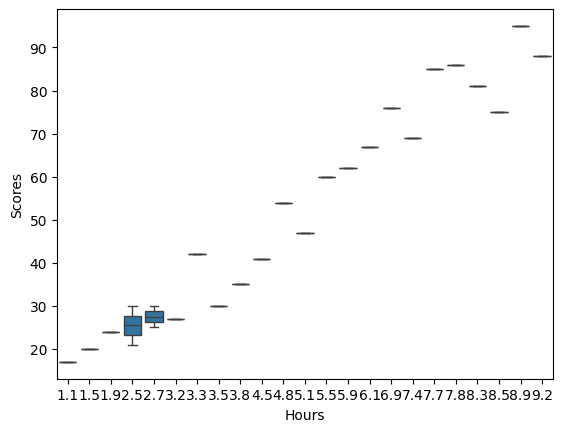

In [18]:
sns.boxplot(x='Hours',y='Scores',data=df)

C:\Users\shaik\AppData\Local\Temp\ipykernel_17780\801729244.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Hours'],shade=True)
C:\Users\shaik\AppData\Local\Temp\ipykernel_17780\801729244.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Scores'],shade=True)


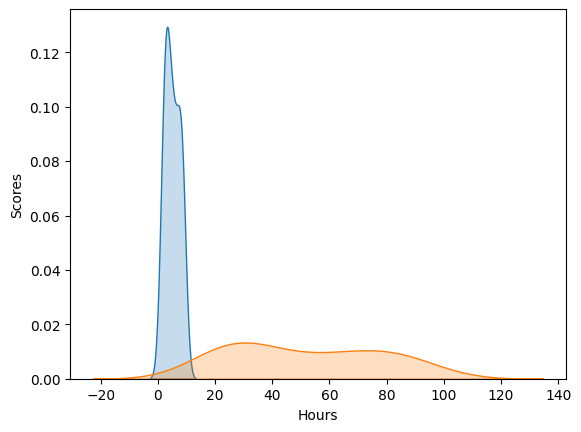

In [ ]:
sns.kdeplot(df['Hours'],shade=True)
sns.kdeplot(df['Scores'],shade=True)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

C:\Users\shaik\AppData\Local\Temp\ipykernel_17780\3334645269.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Scores'],shade=True)


<Axes: xlabel='Scores', ylabel='Density'>

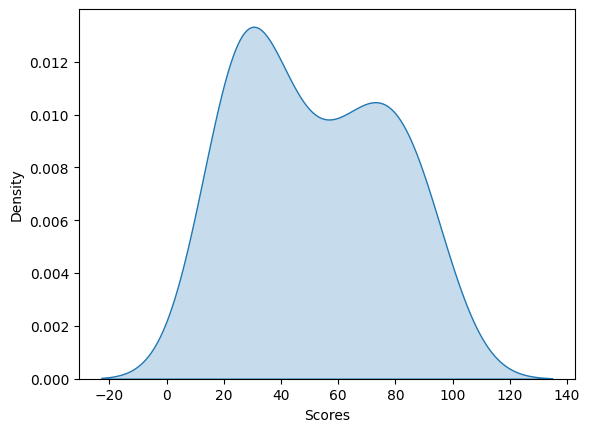

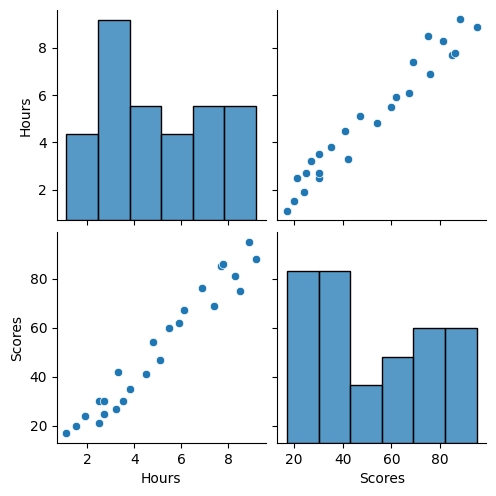

In [22]:
sns.pairplot(df)

In [23]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [24]:
#train test split 
x=df[['Hours']]
y=df['Scores']


In [25]:
#train test split
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [26]:
#standardization
from sklearn.preprocessing import StandardScaler 

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [28]:
from sklearn.linear_model import LinearRegression 
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)
y_pred=linear_regression.predict(x_test)


In [29]:
linear_regression.intercept_

np.float64(52.77777777777778)

In [30]:
linear_regression.coef_

array([24.7101327])

In [31]:
#means sequared errr 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rsme=np.sqrt(mse)
print(mse)
print(mae)
print(rsme)

23.516396034595225
4.425394675156181
4.8493706843873285


In [32]:
#r2 squared error 
from sklearn.metrics import r2_score 
score=r2_score(y_pred,y_test)
score

0.9498549846457609

In [33]:
#adjusted r square 
print(1-(1-score)*len(y_test-1)/(len(y_test)-x_test.shape[1]-1))

0.9297969785040653


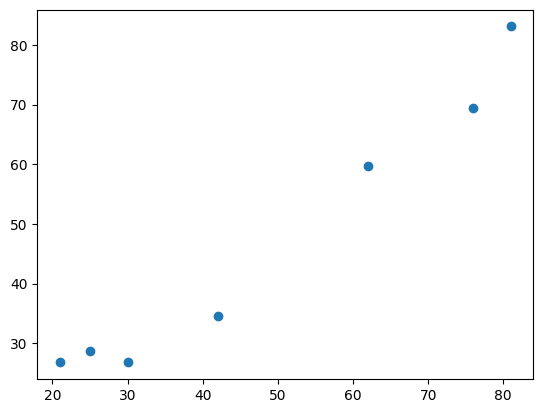

In [34]:
plt.scatter(y_test,y_pred)

In [35]:
residual=y_pred-y_test

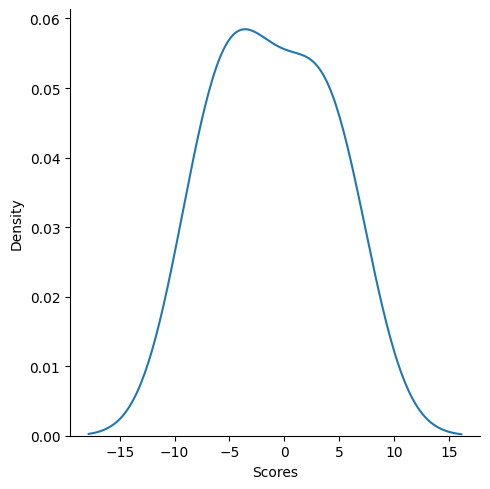

In [36]:
sns.displot(residual,kind="kde")

In [52]:
df['Scores'].unique()

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86])

In [51]:
#Tetsing 
new_hours=12
new_hours=scaler.transform([[new_hours]])
new_score=linear_regression.predict(new_hours)
print(new_score)

[119.0494734]


d:\Udemy\Python\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [58]:
#probably the its not good model becuase whne we give the hours as 12 its giving 120 score but its not
from sklearn.linear_model import LogisticRegression 
Logistic=LogisticRegression()
Logistic.fit(x_train,y_train)
y_pred=Logistic.predict(x_test)



In [59]:
#r2_score 
from sklearn.metrics import r2_score 
score=r2_score(y_pred,y_test)
print(score)

0.6897404853397906


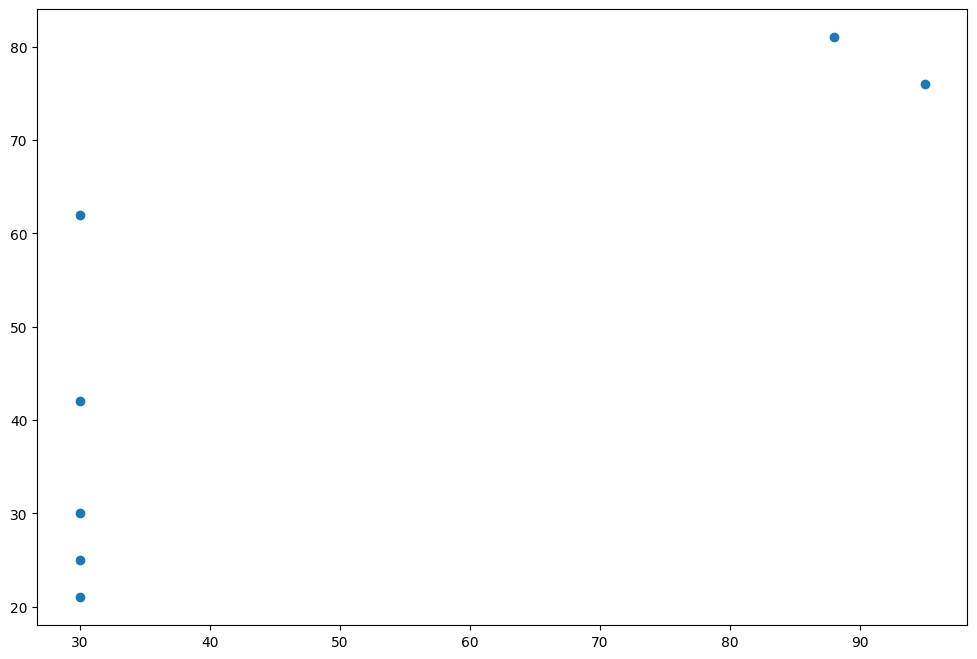

In [60]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred,y_test)
plt.show()

In [ ]:
new_hour=13
new_hour=scaler.transform([[new_hour]])
new_score=Logistic.predict(new_hour)
print(new_score)

[88]


d:\Udemy\Python\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
